In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sqlalchemy.engine import create_engine

DIALECT = 'oracle'
SQL_DRIVER = 'cx_oracle'
USERNAME = 'c##covid'
PASSWORD = 'covid'
HOST = 'localhost'
PORT = 1521
SERVICE = 'xe'
ENGINE_PATH_WIN_AUTH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME + ':' + PASSWORD +'@' + HOST + ':' + str(PORT) + '/?service_name=' + SERVICE

engine = create_engine(ENGINE_PATH_WIN_AUTH)

cases_df = pd.read_sql_query('select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where (state, submission_date) in (select state, max(submission_date) from us_cases_over_time group by state)', engine)
cases_df.head()

,tot_cases,new_case,tot_death,new_death,state,submission_date
0,455635,378,8925,17,MD,2021-05-14
1,59079,83,712,0,WY,2021-05-14
2,974848,2102,19678,32,MI,2021-05-14
3,537813,1954,11024,23,AL,2021-05-14
4,1,0,0,0,FSM,2021-05-14


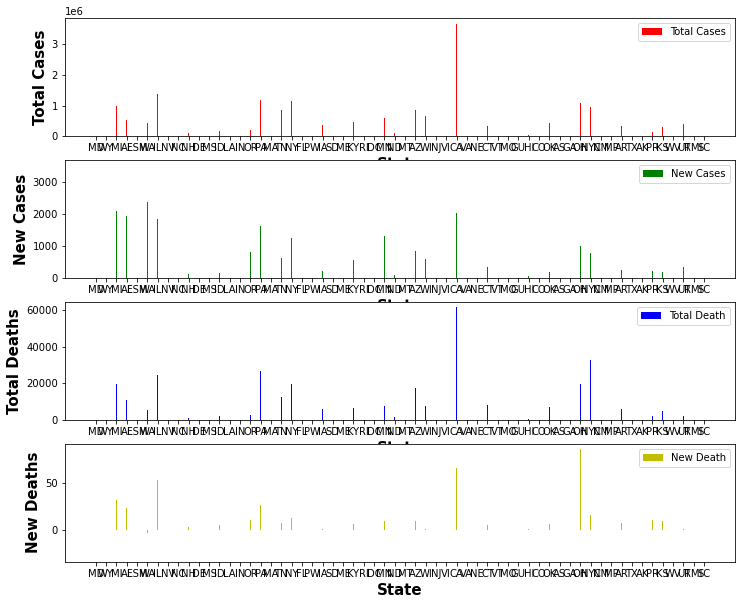

In [25]:
barWidth = 0.05
fig = plt.subplots(figsize =(12, 10))

tot_cases = cases_df['tot_cases']
new_cases = cases_df['new_case']
tot_death = cases_df['tot_death']
new_death = cases_df['new_death']
state = cases_df['state']

#fig = plt.subplots(figsize =(12, 8))

plt.subplot(4, 1, 1)
plt.bar(state, tot_cases, color ='r', width = barWidth, label ='Total Cases')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Cases', fontweight ='bold', fontsize = 15)
plt.legend()

plt.subplot(4, 1, 2)
plt.bar(state, new_cases, color ='g', width = barWidth, label ='New Cases')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('New Cases', fontweight ='bold', fontsize = 15)
plt.legend()

plt.subplot(4, 1, 3)
plt.bar(state, tot_death, color ='b', width = barWidth, label ='Total Death')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Deaths', fontweight ='bold', fontsize = 15)
plt.legend()

plt.subplot(4, 1, 4)
plt.bar(state, new_death, color ='y', width = barWidth, label ='New Death')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('New Deaths', fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

In [27]:
ca_df = pd.read_sql_query("select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where state = 'CA' order by submission_date", engine)
oh_df = pd.read_sql_query("select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where state = 'OH' order by submission_date", engine)
fl_df = pd.read_sql_query("select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where state = 'FL' order by submission_date", engine)
ne_df = pd.read_sql_query("select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where state = 'NE' order by submission_date", engine)
wa_df = pd.read_sql_query("select tot_cases, new_case, tot_death, new_death, state, submission_date from us_cases_over_time where state = 'WA' order by submission_date", engine)
ca_df.head()

,tot_cases,new_case,tot_death,new_death,state,submission_date
0,0,0,0,0,CA,2020-01-22
1,0,0,0,0,CA,2020-01-23
2,0,0,0,0,CA,2020-01-24
3,0,0,0,0,CA,2020-01-25
4,2,2,0,0,CA,2020-01-26


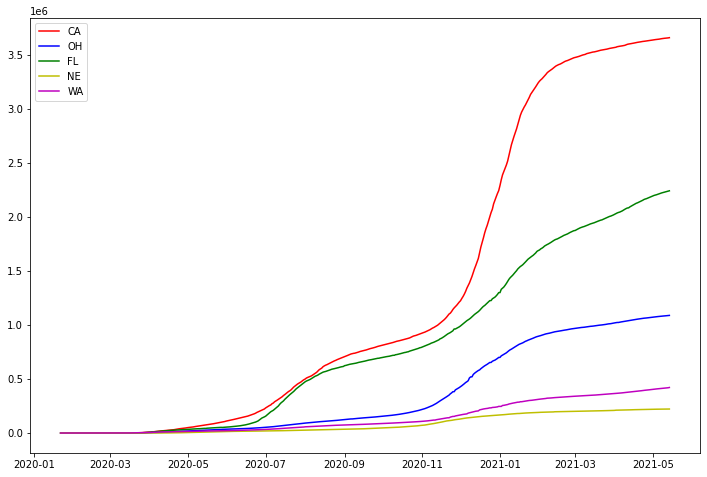

In [28]:
fig = plt.subplots(figsize =(12, 8))

# y axes
y1 = ca_df['tot_cases']
y2 = oh_df['tot_cases']
y3 = fl_df['tot_cases']
y4 = ne_df['tot_cases']
y5 = wa_df['tot_cases']

# x axes
x = ca_df['submission_date']
 
# Make the plot
plt.plot (x, y1, 'r', label='CA')
plt.plot (x, y2, 'b', label='OH')
plt.plot (x, y3, 'g', label='FL')
plt.plot (x, y4, 'y', label='NE')
plt.plot (x, y5, 'm', label='WA')

plt.legend()
plt.show()

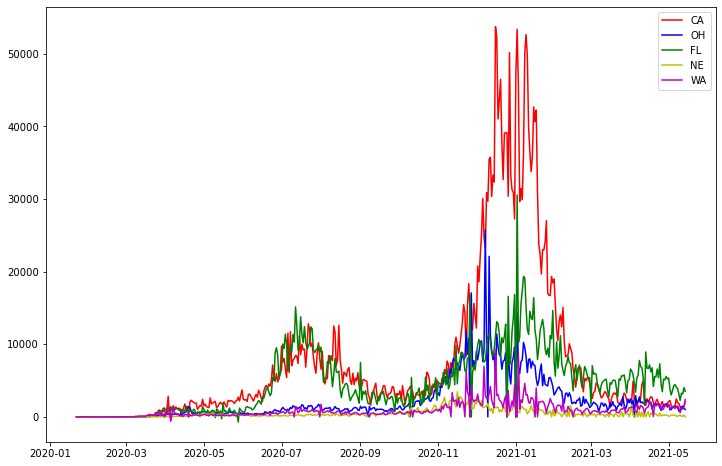

In [30]:
fig = plt.subplots(figsize =(12, 8))

# y axes
y1 = ca_df['new_case']
y2 = oh_df['new_case']
y3 = fl_df['new_case']
y4 = ne_df['new_case']
y5 = wa_df['new_case']

# x axes
x = ca_df['submission_date']
 
# Make the plot
plt.plot (x, y1, 'r', label='CA')
plt.plot (x, y2, 'b', label='OH')
plt.plot (x, y3, 'g', label='FL')
plt.plot (x, y4, 'y', label='NE')
plt.plot (x, y5, 'm', label='WA')

plt.legend()
plt.show()

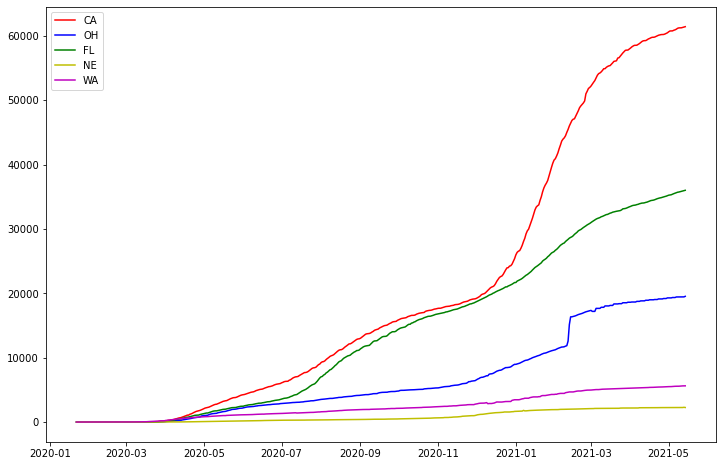

In [31]:
fig = plt.subplots(figsize =(12, 8))

# y axes
y1 = ca_df['tot_death']
y2 = oh_df['tot_death']
y3 = fl_df['tot_death']
y4 = ne_df['tot_death']
y5 = wa_df['tot_death']

# x axes
x = ca_df['submission_date']
 
# Make the plot
plt.plot (x, y1, 'r', label='CA')
plt.plot (x, y2, 'b', label='OH')
plt.plot (x, y3, 'g', label='FL')
plt.plot (x, y4, 'y', label='NE')
plt.plot (x, y5, 'm', label='WA')

plt.legend()
plt.show()

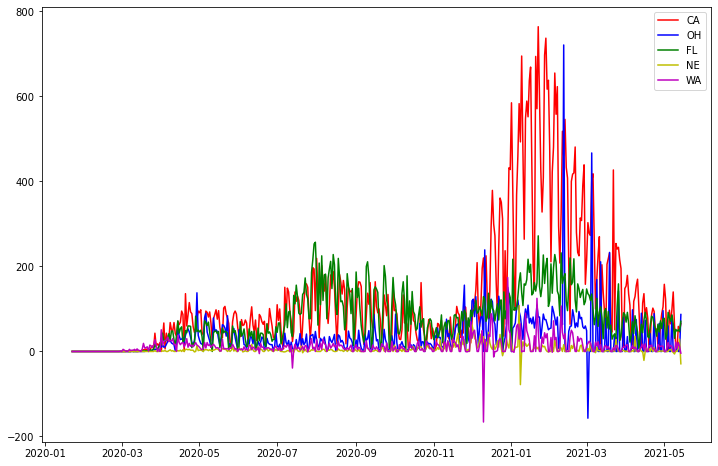

In [32]:
fig = plt.subplots(figsize =(12, 8))

# y axes
y1 = ca_df['new_death']
y2 = oh_df['new_death']
y3 = fl_df['new_death']
y4 = ne_df['new_death']
y5 = wa_df['new_death']

# x axes
x = ca_df['submission_date']
 
# Make the plot
plt.plot (x, y1, 'r', label='CA')
plt.plot (x, y2, 'b', label='OH')
plt.plot (x, y3, 'g', label='FL')
plt.plot (x, y4, 'y', label='NE')
plt.plot (x, y5, 'm', label='WA')

plt.legend()
plt.show()

In [40]:
cases_df = pd.read_sql_query("""select stcode, doses, population, doses*100/population dose_pc from (
select stcode, sum(first_dose_allocations) doses, (select sum(popestimate2019) from usstatenamescodes s, us_census_data c
where upper(c.stname) = s.stname and s.stcode = x.stcode ) population
from (select s.stname, s.stcode, v.first_dose_allocations, v.week_of_allocations
from vaccines_janssen v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, v.first_dose_allocations, v.week_of_allocations
from vaccines_janssen v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', v.first_dose_allocations, v.week_of_allocations
from vaccines_janssen v
where v.jurisdiction = 'New York City'
union all
select 'ILLINOIS', 'IL', v.first_dose_allocations, v.week_of_allocations
from vaccines_janssen v
where v.jurisdiction = 'Chicago'
) x group by stcode)""", engine)
cases_df.head()

,stcode,doses,population,dose_pc
0,AL,451400,9806370.0,4.603130
1,AK,39900,1463090.0,2.727105
2,AZ,253900,14557434.0,1.744126
3,AR,705400,6035608.0,11.687306
4,CA,1535600,79024446.0,1.943196


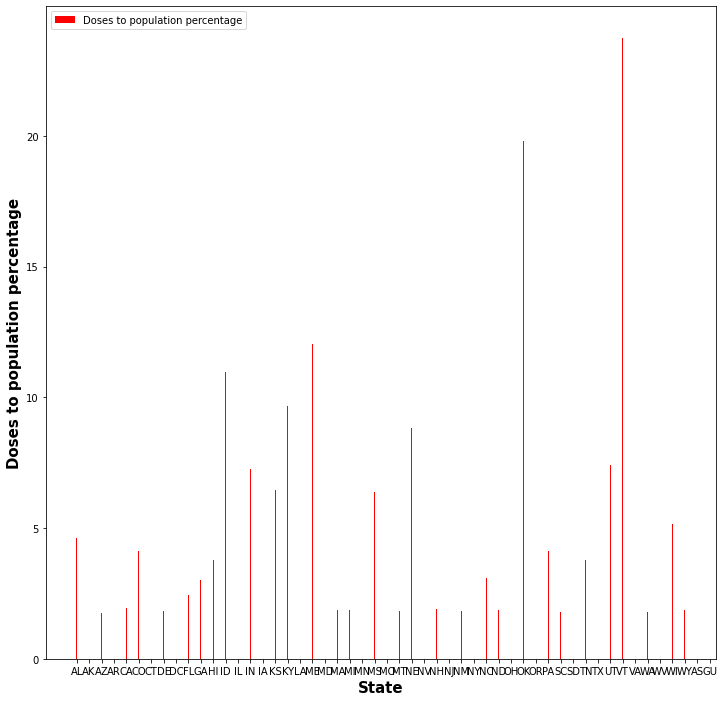

In [41]:
barWidth = 0.05
fig = plt.subplots(figsize =(12, 12))

doses_pc = cases_df['dose_pc']
state = cases_df['stcode']

plt.bar(state, doses_pc, color ='r', width = barWidth, label ='Doses to population percentage')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('Doses to population percentage', fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

In [42]:
cases_df = pd.read_sql_query("""select stcode, doses, population, doses*100/population dose_pc from (
select stcode, sum(first_dose_allocations)/2 doses, (select sum(popestimate2019) from usstatenamescodes s, us_census_data c
where upper(c.stname) = s.stname and s.stcode = x.stcode ) population
from (select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v
where v.jurisdiction = 'New York City'
union all
select 'ILLINOIS', 'IL', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v
where v.jurisdiction = 'Chicago'
) x group by stcode)""", engine)
cases_df.head()

,stcode,doses,population,dose_pc
0,AL,2574080,9806370.0,26.249061
1,AK,225860,1463090.0,15.437191
2,AZ,1448360,14557434.0,9.949281
3,AR,4018760,6035608.0,66.584178
4,CA,8759960,79024446.0,11.085127


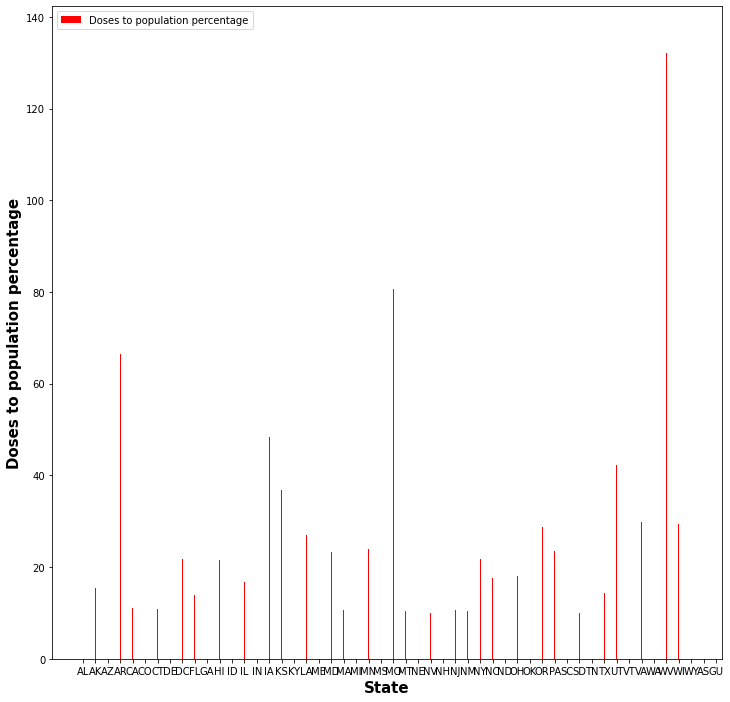

In [43]:
barWidth = 0.05
fig = plt.subplots(figsize =(12, 12))

doses_pc = cases_df['dose_pc']
state = cases_df['stcode']

plt.bar(state, doses_pc, color ='r', width = barWidth, label ='Doses to population percentage')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('Doses to population percentage', fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

In [45]:
cases_df = pd.read_sql_query("""select stcode, doses, population, doses*100/population dose_pc from (
select stcode, sum(first_dose_allocations)/2 doses, (select sum(popestimate2019) from usstatenamescodes s, us_census_data c
where upper(c.stname) = s.stname and s.stcode = x.stcode ) population
from (select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v
where v.jurisdiction = 'New York City'
union all
select 'ILLINOIS', 'IL', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v
where v.jurisdiction = 'Chicago'
) x group by stcode)""", engine)
cases_df.head()

,stcode,doses,population,dose_pc
0,AL,3016455,9806370.0,30.760159
1,AK,280410,1463090.0,19.165602
2,AZ,1690260,14557434.0,11.610975
3,AR,4724655,6035608.0,78.279686
4,CA,10172370,79024446.0,12.872434


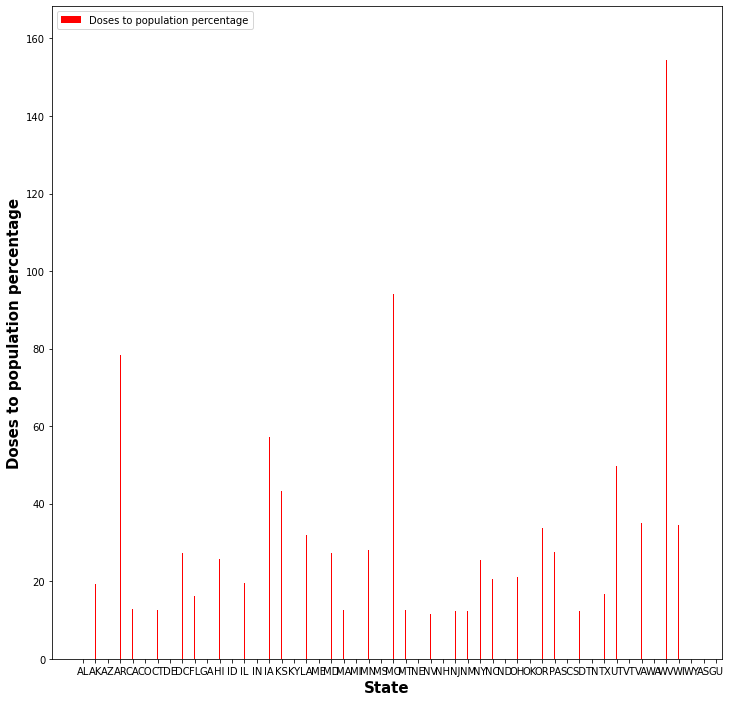

In [46]:
barWidth = 0.05
fig = plt.subplots(figsize =(12, 12))

doses_pc = cases_df['dose_pc']
state = cases_df['stcode']

plt.bar(state, doses_pc, color ='r', width = barWidth, label ='Doses to population percentage')
plt.xlabel('State', fontweight ='bold', fontsize = 15)
plt.ylabel('Doses to population percentage', fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

In [47]:
cases_df = pd.read_sql_query("""select stcode, 'Janssen' vaccine, sum(first_dose_allocations)/2 doses
from (
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_janssen v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_janssen v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', nvl(v.first_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_janssen v
where v.jurisdiction = 'New York City'
) x where stcode in ('CA', 'TX', 'MO', 'NY', 'OK', 'WV') group by stcode
union all
select stcode, 'Moderna' vaccine, sum(first_dose_allocations)/2 doses
from (
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_moderna v
where v.jurisdiction = 'New York City'
) x where stcode in ('CA', 'TX', 'MO', 'NY', 'OK', 'WV') group by stcode
union all
select stcode, 'pfizer' vaccine, sum(first_dose_allocations)/2 doses
from (select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v, usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union all
select s.stname, s.stcode, nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v, usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
and not exists (select 1 from us_census_data c where c.ctyname like '%' || v.jurisdiction || '%')
union all
select 'NEW YORK', 'NY', nvl(v.first_dose_allocations, 0)+nvl(v.second_dose_allocations, 0) first_dose_allocations, v.week_of_allocations
from vaccines_pfizer v
where v.jurisdiction = 'New York City'
) x where stcode in ('CA', 'TX', 'MO', 'NY', 'OK', 'WV') group by stcode""", engine)
cases_df.head()

,stcode,vaccine,doses
0,CA,Janssen,767800
1,MO,Janssen,867950
2,NY,Janssen,741500
3,TX,Janssen,726850
4,OK,Janssen,784000


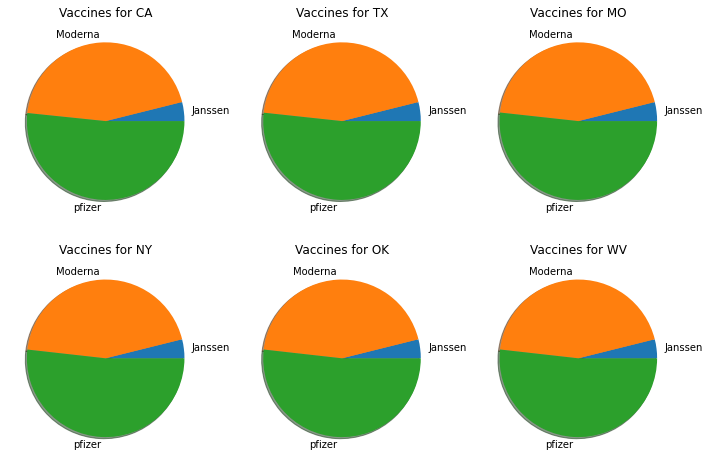

In [59]:
ca_df = cases_df[cases_df.stcode=='CA']
tx_df = cases_df[cases_df.stcode=='TX']
mo_df = cases_df[cases_df.stcode=='MO']
ny_df = cases_df[cases_df.stcode=='NY']
ok_df = cases_df[cases_df.stcode=='OK']
wv_df = cases_df[cases_df.stcode=='WV']

fig = plt.subplots(figsize =(12, 8))

plt.subplot(2, 3, 1)
plt.pie(ca_df['doses'], labels=ca_df['vaccine'], shadow=True)
plt.title("Vaccines for CA")

plt.subplot(2, 3, 2)
plt.pie(tx_df['doses'], labels=tx_df['vaccine'], shadow=True)
plt.title("Vaccines for TX")

plt.subplot(2, 3, 3)
plt.pie(mo_df['doses'], labels=mo_df['vaccine'], shadow=True)
plt.title("Vaccines for MO")

plt.subplot(2, 3, 4)
plt.pie(ny_df['doses'], labels=ny_df['vaccine'], shadow=True)
plt.title("Vaccines for NY")

plt.subplot(2, 3, 5)
plt.pie(ok_df['doses'], labels=ok_df['vaccine'], shadow=True)
plt.title("Vaccines for OK")

plt.subplot(2, 3, 6)
plt.pie(wv_df['doses'], labels=wv_df['vaccine'], shadow=True)
plt.title("Vaccines for WV")
plt.show()

##### From the census data only the required columns need to be taken and loaded into a look up table to get the population of any state based on the state code.

In [60]:
cases_df = pd.read_sql_query("""select s.stcode, u.STNAME, u.CTYNAME, u.CENSUS2010POP, u.ESTIMATESBASE2010, u.POPESTIMATE2019, u.NPOPCHG_2019,
u.BIRTHS2019, u.DEATHS2019, u.NATURALINC2019, u.INTERNATIONALMIG2019, u.DOMESTICMIG2019, u.NETMIG2019,
u.RESIDUAL2019, u.GQESTIMATES2019, u.RBIRTH2019, u.RDEATH2019, u.RNATURALINC2019, u.RINTERNATIONALMIG2019,
u.RDOMESTICMIG2019, u.RNETMIG2019
from us_census_data u, usstatenamescodes s
where s.stname = upper(u.stname)""", engine)
cases_df.head()

,stcode,stname,ctyname,census2010pop,estimatesbase2010,popestimate2019,npopchg_2019,births2019,deaths2019,naturalinc2019,...,domesticmig2019,netmig2019,residual2019,gqestimates2019,rbirth2019,rdeath2019,rnaturalinc2019,rinternationalmig2019,rdomesticmig2019,rnetmig2019
0,AL,Alabama,Greene County,9045,9039,8111,-98,96,93,3,...,-101,-101,0,45,11.764706,11.397059,0.367647,0.000000,-12.377451,-12.377451
1,AL,Alabama,Hale County,15760,15762,14651,-98,190,181,9,...,-103,-106,-1,221,12.925170,12.312925,0.612245,-0.204082,-7.006803,-7.210884
2,AL,Alabama,Henry County,17302,17299,17205,32,167,213,-46,...,79,78,0,199,9.715516,12.391646,-2.676130,-0.058177,4.595963,4.537786
3,AL,Alabama,Houston County,101547,101560,105882,1112,1304,1137,167,...,936,947,-2,1415,12.380609,10.795055,1.585553,0.104438,8.886695,8.991132
4,AL,Alabama,Jackson County,53227,53223,51626,5,562,675,-113,...,128,121,-3,597,10.886515,13.075440,-2.188926,-0.135597,2.479491,2.343894


In [63]:
cases_df.to_csv("E:\\lookups.csv", index=False)

##### A delimited file of the names of states in the US and their standard code also needs to be used as it gives a standardize way to refer to the states in all the datasets.

In [64]:
cases_df = pd.read_sql_query("""select (select min(stcode) from (
select s.stcode
from usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union
select s.stcode
from usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
union
select decode(v.jurisdiction, 'New York City', 'NY', 'Chicago', 'IL', null) from dual
)) stcode, v.jurisdiction, v.first_dose_allocations, v.week_of_allocations
from vaccines_janssen v""", engine)
cases_df.head()

,stcode,jurisdiction,first_dose_allocations,week_of_allocations
0,CT,Connecticut,6400,2021-05-10
1,ME,Maine,2500,2021-05-10
2,MA,Massachusetts,12300,2021-05-10
3,NH,New Hampshire,2500,2021-05-10
4,None,Rhode Island,2000,2021-05-10


In [65]:
cases_df.to_csv("E:\\vaccines_janssen_Mod.csv", index=False)

In [66]:
cases_df = pd.read_sql_query("""select (select min(stcode) from (
select s.stcode
from usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union
select s.stcode
from usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
union
select decode(v.jurisdiction, 'New York City', 'NY', 'Chicago', 'IL', null) from dual
)) stcode, v.jurisdiction, v.first_dose_allocations, v.second_dose_allocations, v.week_of_allocations
from vaccines_moderna v""", engine)
cases_df.head()

,stcode,jurisdiction,first_dose_allocations,second_dose_allocations,week_of_allocations
0,NY,Wyoming,5300,5300,2021-02-08
1,AL,Alabama,40400,40400,2021-02-01
2,AK,Alaska,32300,32300,2021-02-01
3,AS,American Samoa,3200,0,2021-02-01
4,AZ,Arizona,57200,57200,2021-02-01


In [67]:
cases_df.to_csv("E:\\vaccines_moderna_Mod.csv", index=False)

In [68]:
cases_df = pd.read_sql_query("""select (select min(stcode) from (
select s.stcode
from usstatenamescodes s, us_census_data c
where c.ctyname like '%' || v.jurisdiction || '%'
and upper(c.stname) = s.stname
union
select s.stcode
from usstatenamescodes s
where s.stname like '%' || upper(v.jurisdiction) || '%'
union
select decode(v.jurisdiction, 'New York City', 'NY', 'Chicago', 'IL', null) from dual
)) stcode, v.jurisdiction, v.first_dose_allocations, v.second_dose_allocations, v.week_of_allocations
from vaccines_pfizer v""", engine)
cases_df.head()

,stcode,jurisdiction,first_dose_allocations,second_dose_allocations,week_of_allocations
0,HI,Hawaii,9750,9750,2021-02-08
1,ID,Idaho,10725,10725,2021-02-08
2,IL,Illinois,63375,63375,2021-02-08
3,IN,Indiana,40950,40950,2021-02-08
4,IA,Iowa,19500,19500,2021-02-08


In [69]:
cases_df.to_csv("E:\\vaccines_pfizer_Mod.csv", index=False)